# Task 1: Deep Exploratory Data Analysis (EDA)

This notebook covers comprehensive data profiling, statistical checks, and advanced visualizations to understand risk factors.

In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.data.loader import load_data
from src.utils.plots import (
    plot_outliers_boxplots, 
    plot_geo_trends, 
    plot_scatter_trend, 
    plot_categorical_breakdown,
    plot_correlation_heatmap,
    plot_kde_distribution
)

DATA_PATH = '../data/raw/MachineLearningRating.txt'
# Fallback check
if not os.path.exists(DATA_PATH):
     DATA_PATH = 'data/raw/MachineLearningRating.txt'

df = load_data(DATA_PATH)
df.shape

(1000098, 52)

## 1. Univariate Analysis (Deep Dive)
We examine distributions, skewness, and basic statistics for numerical variables.

In [2]:
numerical_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']

print("--- Descriptive Statistics ---")
desc = df[numerical_cols].describe().T
desc['skewness'] = df[numerical_cols].skew()
desc['kurtosis'] = df[numerical_cols].kurt()
display(desc)

print("\nInterpretation:\n- High skewness in TotalClaims indicates extreme risk events.\n- High kurtosis suggests heavy tails (outliers).")

--- Descriptive Statistics ---


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
TotalPremium,1000098.0,61.905496,2.302845e+02,-782.576754,0.0000,2.178333,21.929825,6.528260e+04,138.596458,37176.185477
TotalClaims,1000098.0,64.861190,2.384075e+03,-12002.412281,0.0000,0.000000,0.000000,3.930921e+05,69.933118,6791.926170
SumInsured,1000098.0,604172.732589,1.508332e+06,0.010000,5000.0000,7500.000000,250000.000000,1.263620e+07,2.548565,4.645169
CalculatedPremiumPerTerm,1000098.0,117.875691,3.997017e+02,0.000000,3.2248,8.436900,90.000000,7.442217e+04,122.974581,22210.701737



Interpretation:
- High skewness in TotalClaims indicates extreme risk events.
- High kurtosis suggests heavy tails (outliers).


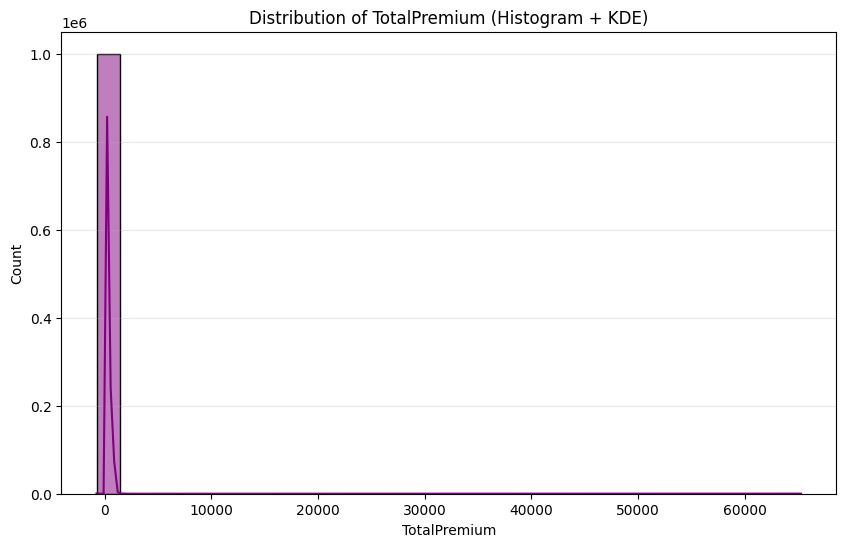

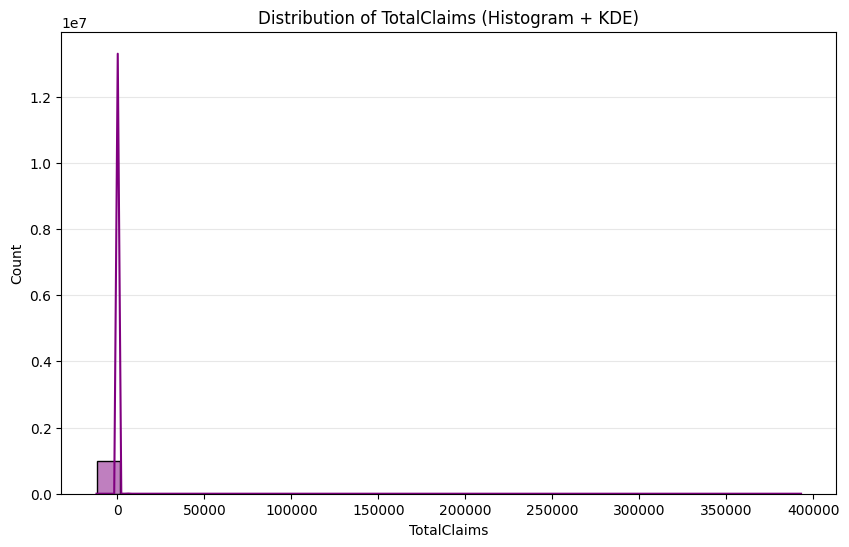

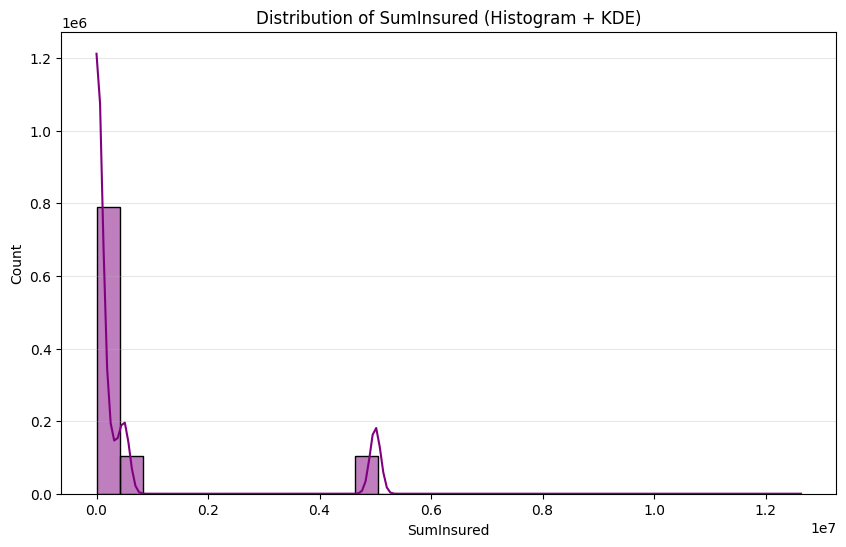

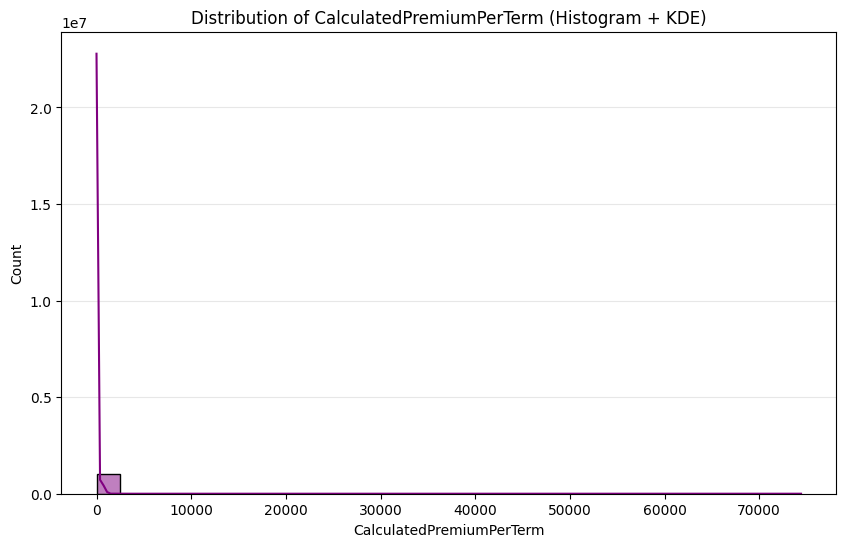

In [3]:
# Visualizing distributions with KDE
for col in numerical_cols:
    if col in df.columns:
        plot_kde_distribution(df, col)

## 2. Bivariate & Multivariate Analysis
Analyzing relationships between variables to find drivers of Claims.

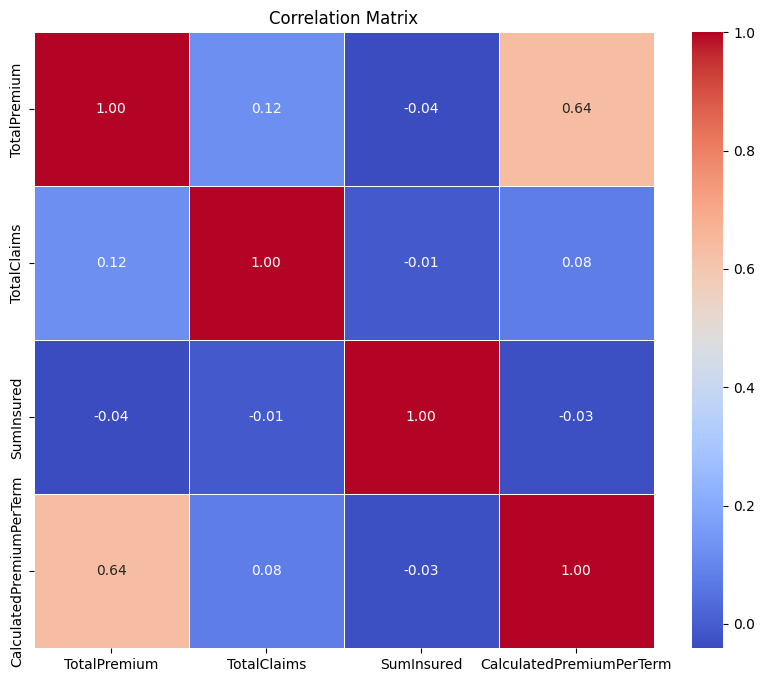

In [4]:
# Correlation Matrix
plot_correlation_heatmap(df, numerical_cols)

**Correlation Insights:**
- Strong correlation expected between `TotalPremium` and `SumInsured`.
- `TotalClaims` correlation with Premium helps check pricing efficiency.

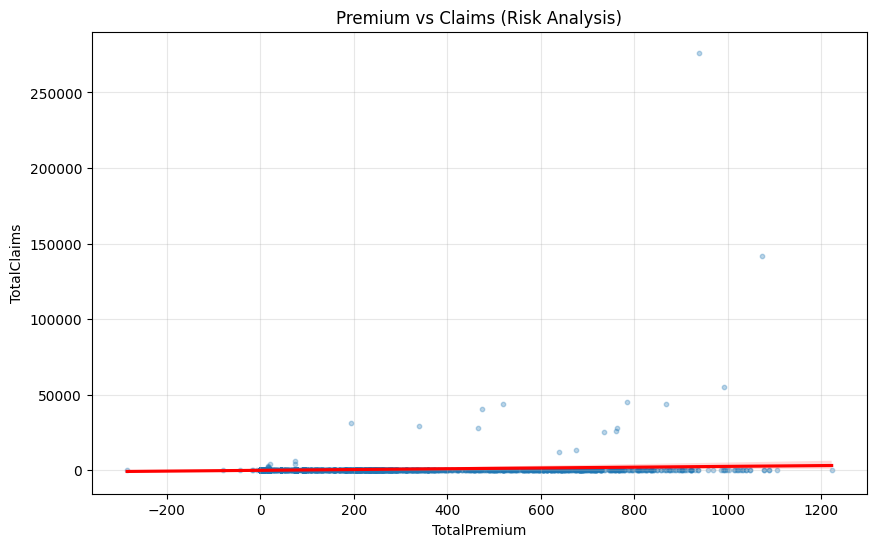

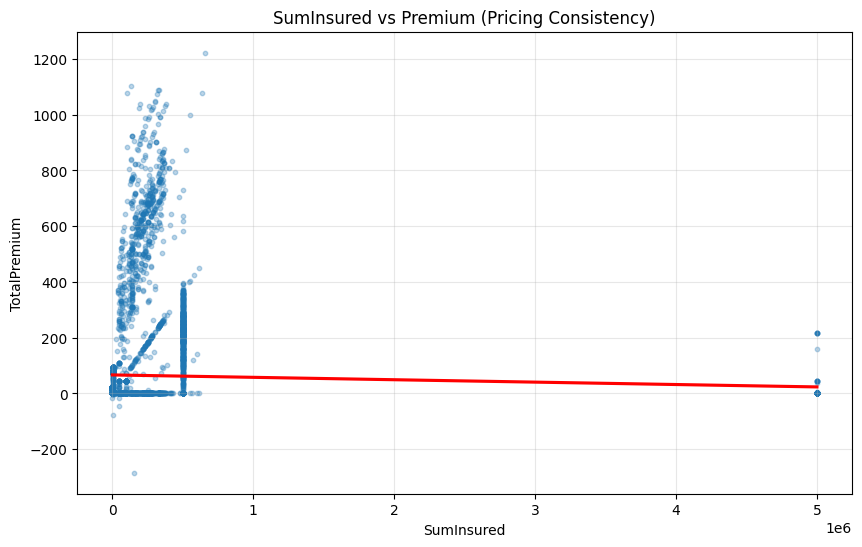

In [5]:
# Scatter Plots with Trends
plot_scatter_trend(df, 'TotalPremium', 'TotalClaims', title='Premium vs Claims (Risk Analysis)')
plot_scatter_trend(df, 'SumInsured', 'TotalPremium', title='SumInsured vs Premium (Pricing Consistency)')

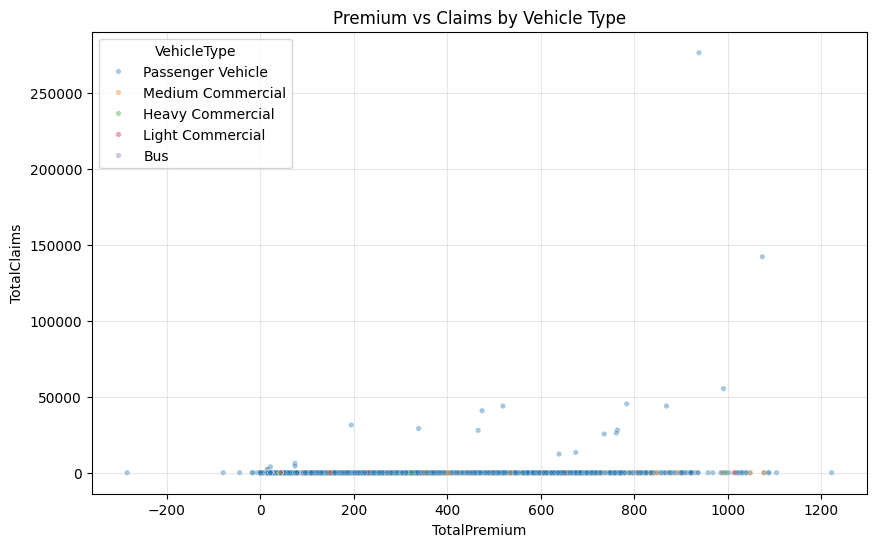

In [6]:
# Multivariate: Premium vs Claims by Vehicle Type
if 'VehicleType' in df.columns:
    plot_scatter_trend(df, 'TotalPremium', 'TotalClaims', title='Premium vs Claims by Vehicle Type', hue_col='VehicleType')

## 3. Categorical Comparisons
Risk analysis across categorical segments: Gender, Province, VehicleType.

c:\Users\hp\Downloads\KAIM\KAIM W3\Insurance-claims-Intelligence\src\utils\plots.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x=cat_col, y=value_col, palette="coolwarm")


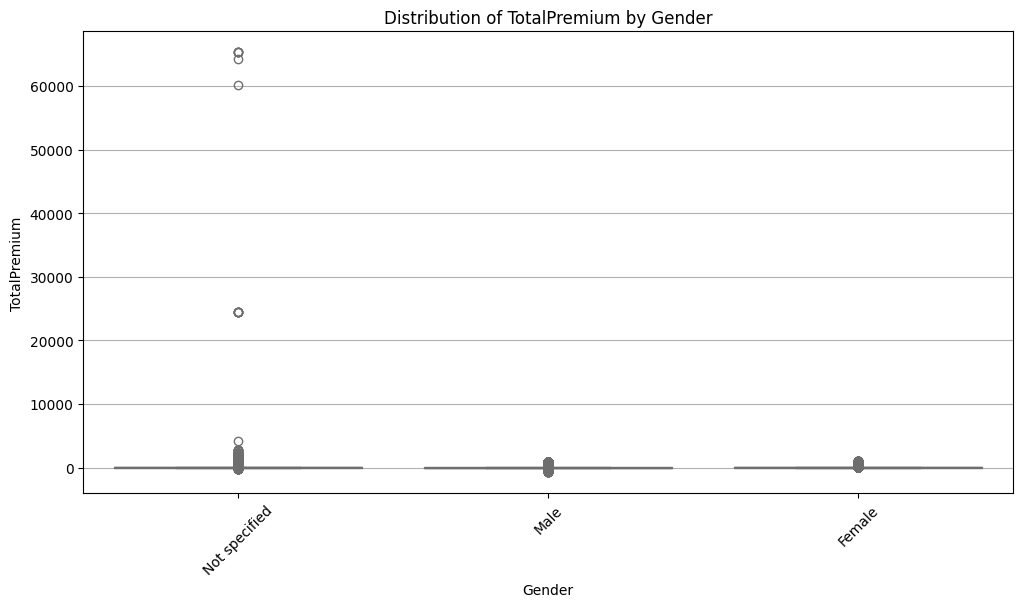

c:\Users\hp\Downloads\KAIM\KAIM W3\Insurance-claims-Intelligence\src\utils\plots.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x=cat_col, y=value_col, palette="coolwarm")


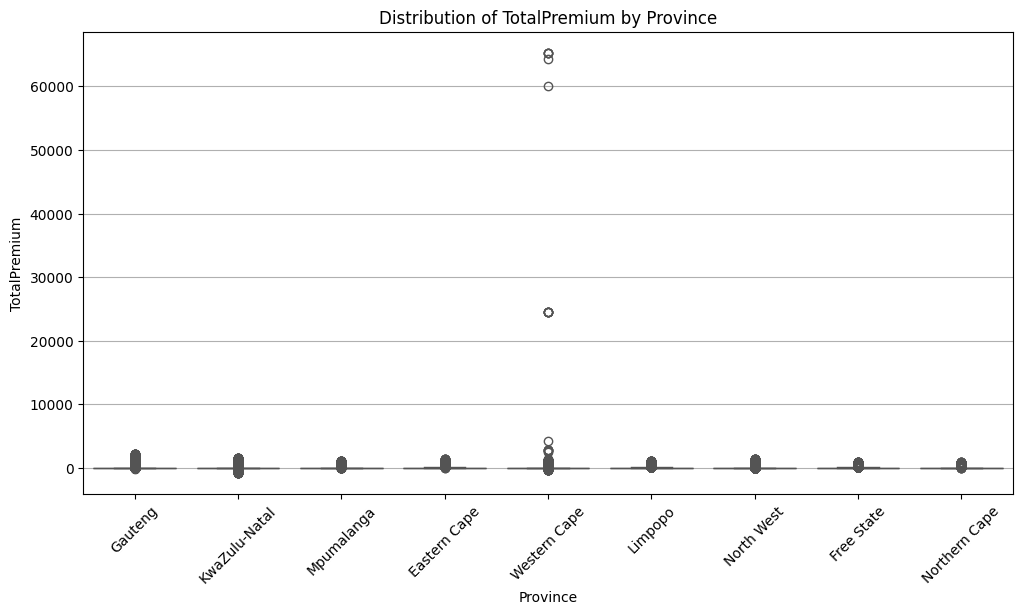

c:\Users\hp\Downloads\KAIM\KAIM W3\Insurance-claims-Intelligence\src\utils\plots.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x=cat_col, y=value_col, palette="coolwarm")


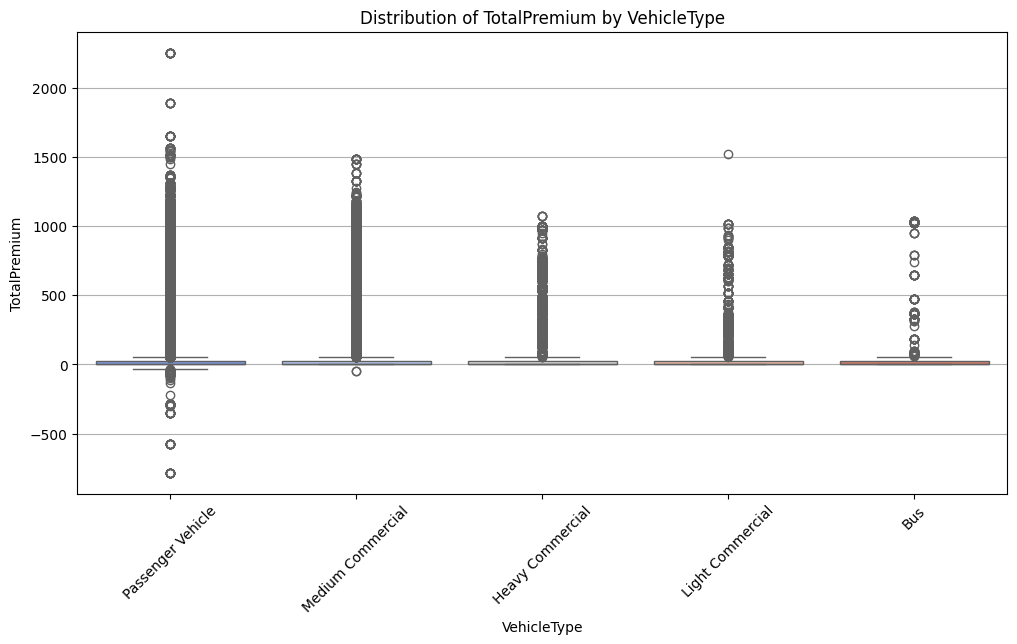

c:\Users\hp\Downloads\KAIM\KAIM W3\Insurance-claims-Intelligence\src\utils\plots.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x=cat_col, y=value_col, palette="coolwarm")


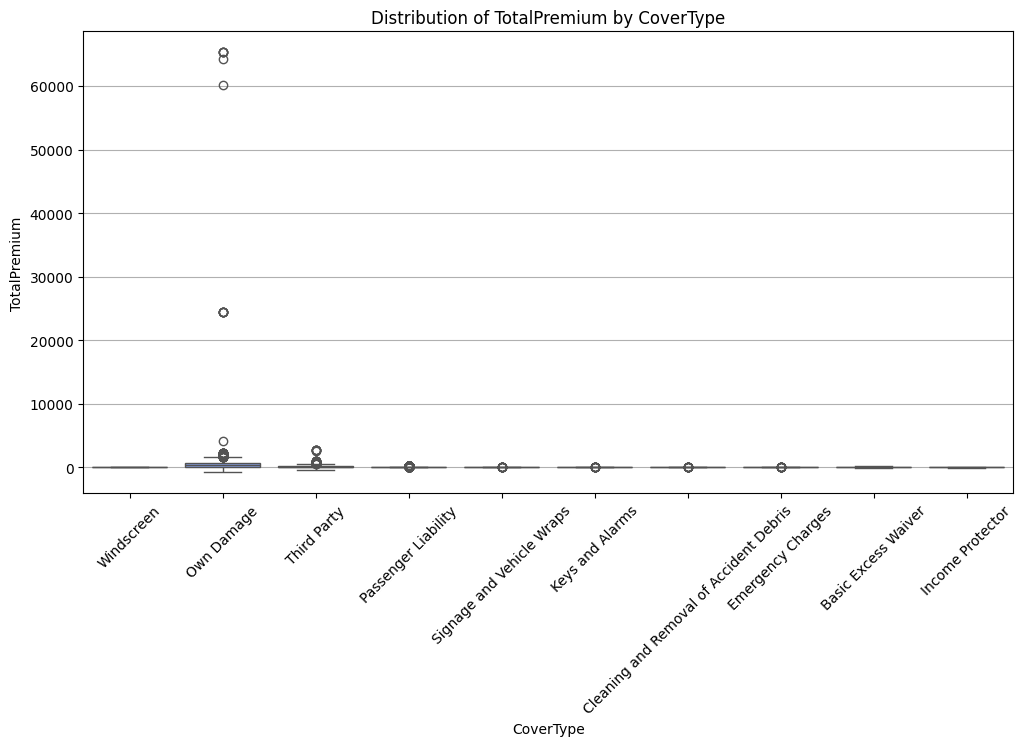

In [7]:
categorical_cols = ['Gender', 'Province', 'VehicleType', 'CoverType']
target_col = 'TotalPremium'

for cat in categorical_cols:
    if cat in df.columns:
        plot_categorical_breakdown(df, cat, target_col, title=f'Distribution of {target_col} by {cat}')

c:\Users\hp\Downloads\KAIM\KAIM W3\Insurance-claims-Intelligence\src\utils\plots.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette="viridis")


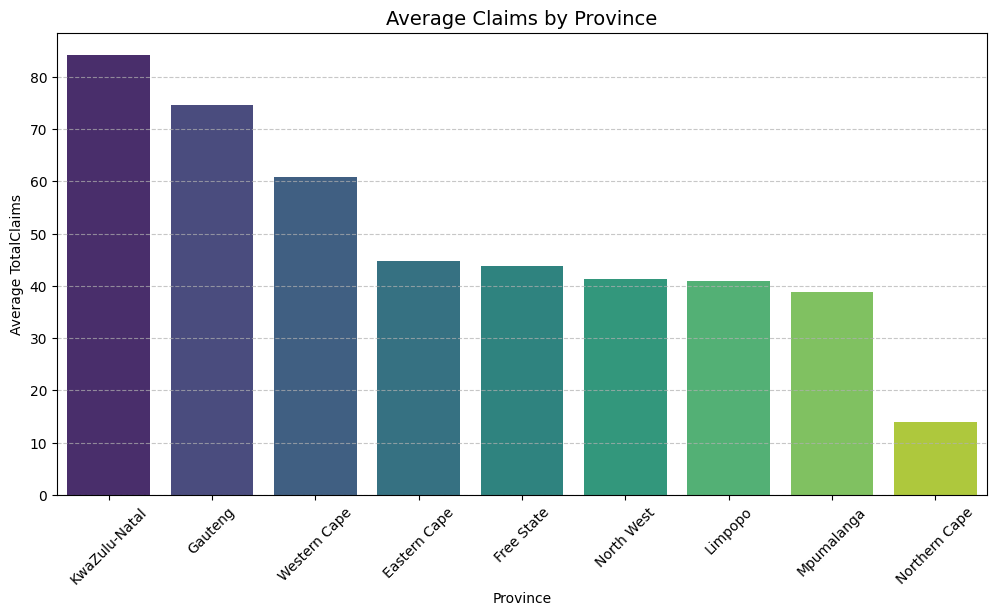

In [8]:
# Geo Analysis
if 'Province' in df.columns:
    plot_geo_trends(df, 'Province', 'TotalClaims', title='Average Claims by Province')

## 4. Outlier Analysis
Identifying extreme values that may distort modeling.

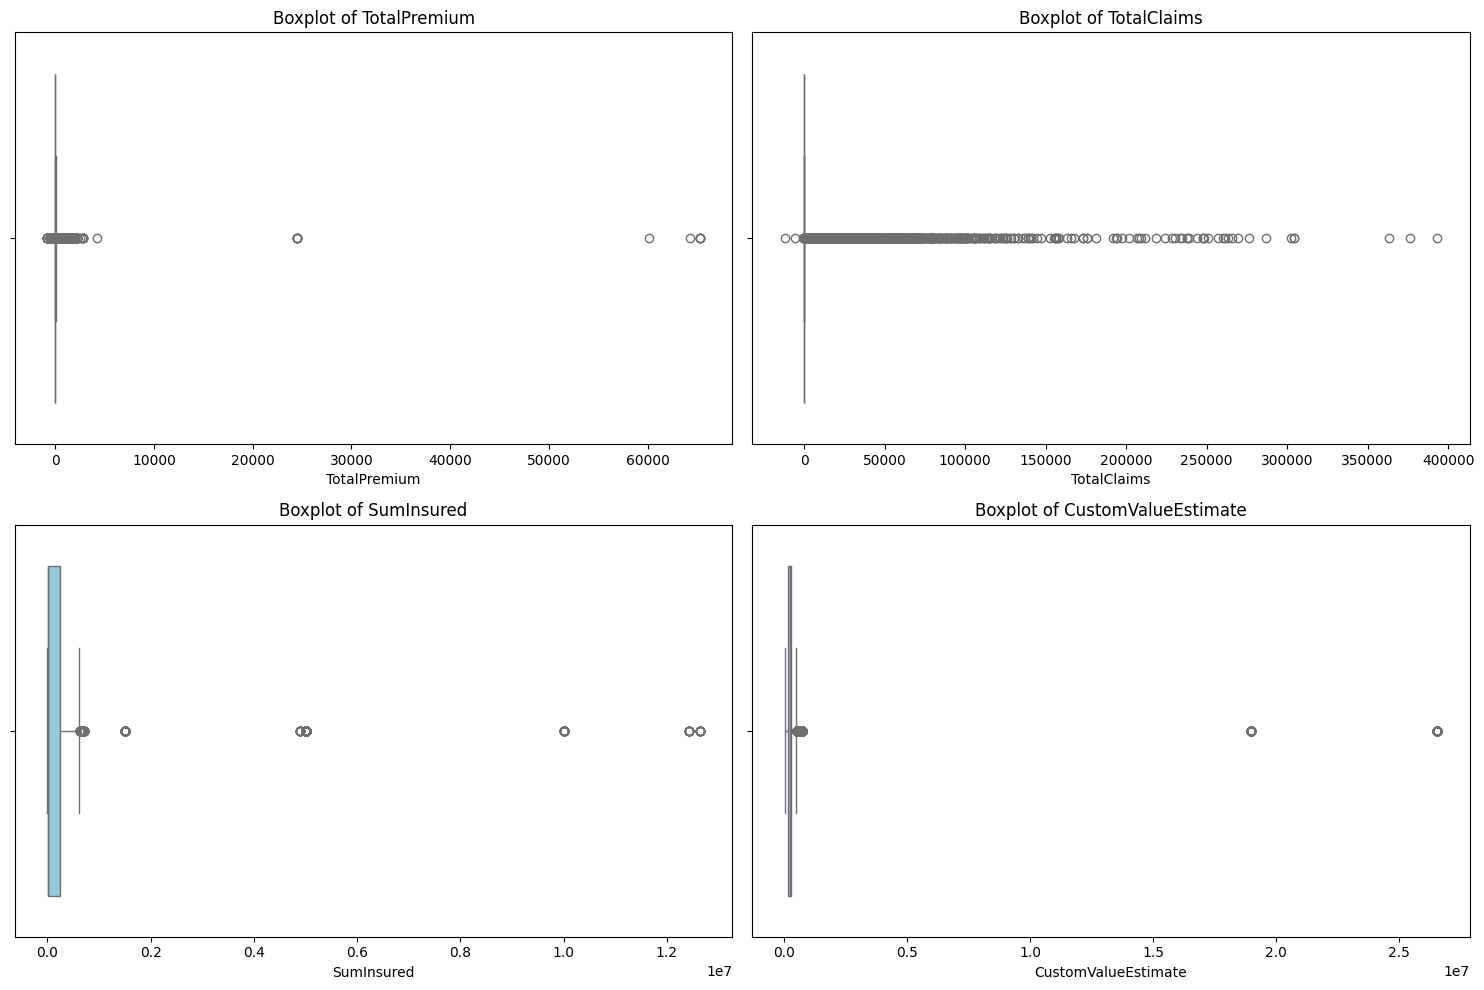

In [9]:
outlier_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate']
plot_outliers_boxplots(df, outlier_cols)

## 5. Summary Findings
1. **Distributions**: Most financial variables are right-skewed.
2. **Correlations**: Premium tracks SumInsured well.
3. **Risk Drivers**: Certain provinces show higher average claims.